In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
animals = np.loadtxt('../../data_lab2/animals.dat', delimiter=',')
animals = animals.reshape([32,84])
animals_names = np.loadtxt('../../data_lab2/animalnames.txt', dtype='str')

In [208]:
def get_min_1d(x,w):
    diff = w-x
    dist = np.sum(abs(diff),axis=1)

    min_node = np.argmin(dist)
    return(min_node)

def som_train(x, epochs):
    n = x.shape[0]
    w = (np.random.randint(low=0, high=2, size =100*84)/1).reshape([100,84])
    for epoch in range(epochs):
        for i in range(n):
            min_node = get_min_1d(x[i], w)
            neighbours = int(50-epoch*50/epochs)
            left_boundary = max(0, min_node-neighbours)
            right_boundary = min(100, min_node+neighbours)
            for j in range(left_boundary, right_boundary):
                w[j] = 0.8*w[j] + 0.2*x[i]

    return w

def som_apply(x, w):
    n = x.shape[0]
    indices = []
    for i in range(n):
        min_node = get_min_1d(x[i], w)
        indices.append(min_node)
    return np.array(indices)

In [209]:
new_w = som_train(animals, 20)
indices = som_apply(animals, new_w)

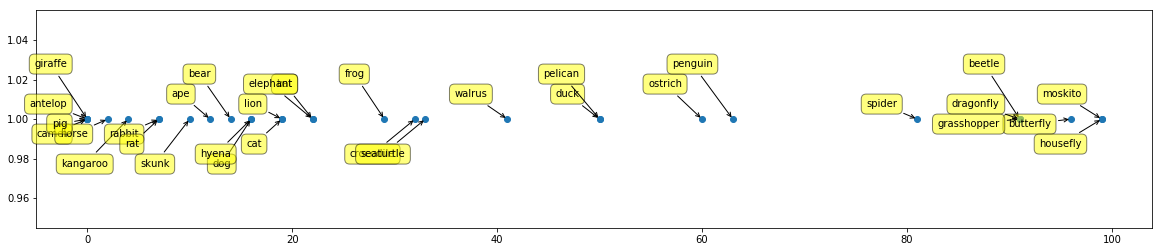

In [223]:
indices
fig, ax = plt.subplots(figsize=[20,4])
ax.plot(indices,[1 for i in range(len(indices))], 'o')
t = [(-20,10), (-20,20), (-20,30), (-20,40), (-20,50), (-20,-10), (-20,-20), (-20,-30), (-20,-40), (-20,-50)]



for i in range(len(animals_names)):
    ax.annotate(
        animals_names[i],
        xy=(indices[i], 1), xytext=t[i%10],
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))


# 4.2

In [236]:
cycle = np.loadtxt('../../data_lab2/cities.dat', delimiter=',').reshape([10,2])

In [287]:
def get_min_cycle(x,w):
    diff = w-x
    dist = np.sum(abs(diff),axis=1)
    min_node = np.argmin(dist)
    return(min_node)


def som_train_cycle(x, epochs=21):
    n = x.shape[0]
    w = np.random.rand(10*2).reshape([10,2])
    neighbours_list = [2,1,0]
    for epoch in range(epochs):
        for i in range(n):
            min_node = get_min_cycle(x[i], w)
            neighbours = neighbours_list[epoch//7]
            index = [i%10 for i in range(min_node-neighbours, min_node + neighbours +1)]
            
            for j in index:
                w[j] = 0.8*w[j] + 0.2*x[i]

    return w

def som_apply(x, w):
    n = x.shape[0]
    indices = []
    for i in range(n):
        min_node = get_min_cycle(x[i], w)
        indices.append(min_node)
    return np.array(indices)

def som_apply_uniq(x, w):
    n = x.shape[0]
    indices = []
    for i in range(n):
        possibilities = np.setdiff1d(np.array([i for i in range(len(w))]),indices)
        min_node = get_min_cycle(x[i], w[possibilities])
        
        indices.append(possibilities[min_node])
    return np.array(indices)

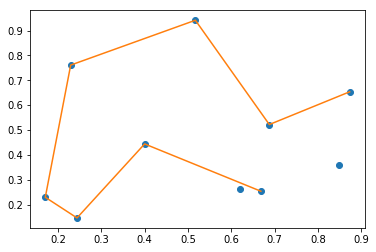

In [280]:
w = som_train_cycle(cycle)
indices = som_apply(cycle, w)
fig, ax = plt.subplots()
ax.plot(cycle.T[0], cycle.T[1], 'o')
ax.plot(cycle[indices].T[0], cycle[indices].T[1])

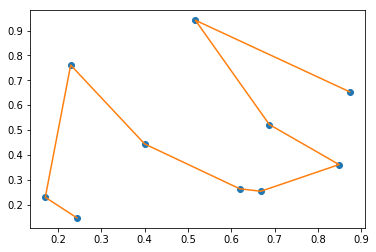

In [288]:
w = som_train_cycle(cycle)
indices = som_apply_uniq(cycle, w)
fig, ax = plt.subplots()
ax.plot(cycle.T[0], cycle.T[1], 'o')
ax.plot(cycle[indices].T[0], cycle[indices].T[1])

In [291]:
animals[2]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.])